In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# preprocessing for training data

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.duplicated().sum()

0

In [8]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train_data.drop(['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)

In [10]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [11]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
train_data.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [13]:
train_data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [14]:
age_mean = train_data['Age'].mean()
train_data['Age'].fillna(age_mean, inplace=True)

In [15]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [16]:
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [17]:
train_data['Cabin'].fillna('Not', inplace=True)

In [18]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [19]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [20]:
most_frequent_embarked = train_data['Embarked'].mode()[0]
print(most_frequent_embarked)

S


In [21]:
train_data['Embarked'].fillna('S', inplace=True)

In [22]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [23]:
# C = Cherbourg, Q = Queenstown, S = Southampton
# make an Encoder
train_data['Embarked'] = train_data['Embarked'].map({'S':0, 'C':1, 'Q':2})
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})


# dummy_df = pd.get_dummies(data['Cabin'], prefix='Cabin')
# data.drop('Cabin', axis=1)
# data = pd.concat([dummy_df], axis=1)

In [24]:
train_data['Cabin'].unique()

array(['Not', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64

In [25]:
# feature Engineering

train_data['floor'] = train_data['Cabin'].str.extract(r'([A-Za-z]+)', expand=False)
train_data['room'] = train_data['Cabin'].str.extract(r'(\d+)', expand=False)

# data['floor'] = data.ffill('Not Reserved', inplace=True)
# data['room'] = data.ffill('Not Reserved', inplace=True)
        
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,floor,room
0,0,3,0,22.000000,1,0,7.2500,Not,0,Not,NaN
1,1,1,1,38.000000,1,0,71.2833,C85,1,C,85
2,1,3,1,26.000000,0,0,7.9250,Not,0,Not,NaN
3,1,1,1,35.000000,1,0,53.1000,C123,0,C,123
4,0,3,0,35.000000,0,0,8.0500,Not,0,Not,NaN
5,0,3,0,29.699118,0,0,8.4583,Not,2,Not,NaN
6,0,1,0,54.000000,0,0,51.8625,E46,0,E,46
7,0,3,0,2.000000,3,1,21.0750,Not,0,Not,NaN
8,1,3,1,27.000000,0,2,11.1333,Not,0,Not,NaN
9,1,2,1,14.000000,1,0,30.0708,Not,1,Not,NaN


In [26]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
floor         0
room        691
dtype: int64

In [27]:
# data['floor'].fillna('Not', inplace=True)
train_data['room'].fillna(0, inplace=True)
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,floor,room
0,0,3,0,22.000000,1,0,7.2500,Not,0,Not,0
1,1,1,1,38.000000,1,0,71.2833,C85,1,C,85
2,1,3,1,26.000000,0,0,7.9250,Not,0,Not,0
3,1,1,1,35.000000,1,0,53.1000,C123,0,C,123
4,0,3,0,35.000000,0,0,8.0500,Not,0,Not,0
5,0,3,0,29.699118,0,0,8.4583,Not,2,Not,0
6,0,1,0,54.000000,0,0,51.8625,E46,0,E,46
7,0,3,0,2.000000,3,1,21.0750,Not,0,Not,0
8,1,3,1,27.000000,0,2,11.1333,Not,0,Not,0
9,1,2,1,14.000000,1,0,30.0708,Not,1,Not,0


In [28]:
train_data.drop('Cabin', axis=1, inplace=True)

In [29]:
train_data['floor'].unique()

array(['Not', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [30]:
train_data['floor'] = train_data['floor'].map({'Not': 0, 
                                   'C': 1, 
                                   'E': 2, 
                                   'G' : 3, 
                                   'D' : 4 , 
                                   'A' : 5, 
                                   'B' : 6, 
                                   'F' : 7, 
                                   'T' : 8})
# data['room'] = data['room'].map({'Not Reserved' : 0})
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,floor,room
0,0,3,0,22.000000,1,0,7.2500,0,0,0
1,1,1,1,38.000000,1,0,71.2833,1,1,85
2,1,3,1,26.000000,0,0,7.9250,0,0,0
3,1,1,1,35.000000,1,0,53.1000,0,1,123
4,0,3,0,35.000000,0,0,8.0500,0,0,0
5,0,3,0,29.699118,0,0,8.4583,2,0,0
6,0,1,0,54.000000,0,0,51.8625,0,2,46
7,0,3,0,2.000000,3,1,21.0750,0,0,0
8,1,3,1,27.000000,0,2,11.1333,0,0,0
9,1,2,1,14.000000,1,0,30.0708,1,0,0


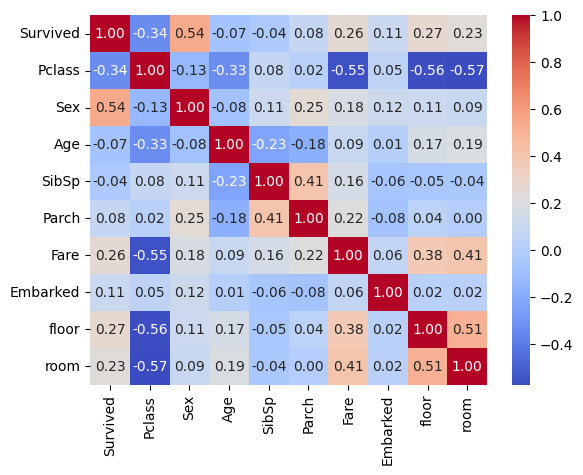

In [31]:
plt.figure()
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [32]:
# check the outliers
for col in train_data.columns:
    if col != 'Survived':
        fig = px.box(train_data, x='Survived', y=col)
        fig.show()

In [33]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'floor', 'room'],
      dtype='object')

In [34]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,floor,room
0,0,3,0,22.000000,1,0,7.2500,0,0,0
1,1,1,1,38.000000,1,0,71.2833,1,1,85
2,1,3,1,26.000000,0,0,7.9250,0,0,0
3,1,1,1,35.000000,1,0,53.1000,0,1,123
4,0,3,0,35.000000,0,0,8.0500,0,0,0
5,0,3,0,29.699118,0,0,8.4583,2,0,0
6,0,1,0,54.000000,0,0,51.8625,0,2,46
7,0,3,0,2.000000,3,1,21.0750,0,0,0
8,1,3,1,27.000000,0,2,11.1333,0,0,0
9,1,2,1,14.000000,1,0,30.0708,1,0,0


In [35]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
floor       0
room        0
dtype: int64

In [36]:
# features = ['Age', 'SibSp', 'Parch', 'Fare','Embarked', 'floor']
# for col in data.columns:
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     data = data[(data[col] >= (Q1 - 1.5 * IQR)) & (data[col] <= (Q3 + 1.5 * IQR))]

#     fig = px.box(data, x=col, y='Survived', width=500, height=400)
#     fig.show()

# Preprocessing for test data

In [37]:
test_data = pd.read_csv('test.csv')

In [38]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
test_data.shape

(418, 11)

In [40]:
test_data.duplicated().sum()

0

In [41]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
test_data.drop(['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)

In [43]:
test_data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [44]:
test_data.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [45]:
age_mean = test_data['Age'].mean()
test_data['Age'].fillna(age_mean, inplace=True)

In [46]:
test_data.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [47]:
Fare_mean = test_data['Fare'].mean()
test_data.replace(test_data['Fare'].isnull(), Fare_mean)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.50000,0,0,7.8292,NaN,Q
1,3,female,47.00000,1,0,7.0000,NaN,S
2,2,male,62.00000,0,0,9.6875,NaN,Q
3,3,male,27.00000,0,0,8.6625,NaN,S
4,3,female,22.00000,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,NaN,S
414,1,female,39.00000,0,0,108.9000,C105,C
415,3,male,38.50000,0,0,7.2500,NaN,S
416,3,male,30.27259,0,0,8.0500,NaN,S


In [48]:
test_data.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [49]:
test_data['Cabin'].fillna('Not', inplace=True)

In [50]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Cabin       0
Embarked    0
dtype: int64

In [51]:
test_data['floor'] = test_data['Cabin'].str.extract(r'([A-Za-z]+)', expand=False)
test_data['room'] = test_data['Cabin'].str.extract(r'(\d+)', expand=False)
test_data.head(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,floor,room
0,3,male,34.50000,0,0,7.8292,Not,Q,Not,NaN
1,3,female,47.00000,1,0,7.0000,Not,S,Not,NaN
2,2,male,62.00000,0,0,9.6875,Not,Q,Not,NaN
3,3,male,27.00000,0,0,8.6625,Not,S,Not,NaN
4,3,female,22.00000,1,1,12.2875,Not,S,Not,NaN
5,3,male,14.00000,0,0,9.2250,Not,S,Not,NaN
6,3,female,30.00000,0,0,7.6292,Not,Q,Not,NaN
7,2,male,26.00000,1,1,29.0000,Not,S,Not,NaN
8,3,female,18.00000,0,0,7.2292,Not,C,Not,NaN
9,3,male,21.00000,2,0,24.1500,Not,S,Not,NaN


In [52]:
test_data.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Cabin         0
Embarked      0
floor         0
room        329
dtype: int64

In [53]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [54]:
test_data.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
floor         0
room        329
dtype: int64

In [55]:
test_data.drop('Cabin', axis=1, inplace=True)

In [56]:
test_data.head(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,floor,room
0,3,male,34.50000,0,0,7.8292,Q,Not,NaN
1,3,female,47.00000,1,0,7.0000,S,Not,NaN
2,2,male,62.00000,0,0,9.6875,Q,Not,NaN
3,3,male,27.00000,0,0,8.6625,S,Not,NaN
4,3,female,22.00000,1,1,12.2875,S,Not,NaN
5,3,male,14.00000,0,0,9.2250,S,Not,NaN
6,3,female,30.00000,0,0,7.6292,Q,Not,NaN
7,2,male,26.00000,1,1,29.0000,S,Not,NaN
8,3,female,18.00000,0,0,7.2292,C,Not,NaN
9,3,male,21.00000,2,0,24.1500,S,Not,NaN


In [57]:
test_data['floor'] = test_data['floor'].map({'Not': 0, 
                                   'C': 1, 
                                   'E': 2, 
                                   'G' : 3, 
                                   'D' : 4 , 
                                   'A' : 5, 
                                   'B' : 6, 
                                   'F' : 7, 
                                   'T' : 8})
test_data.head(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,floor,room
0,3,male,34.50000,0,0,7.8292,Q,0,NaN
1,3,female,47.00000,1,0,7.0000,S,0,NaN
2,2,male,62.00000,0,0,9.6875,Q,0,NaN
3,3,male,27.00000,0,0,8.6625,S,0,NaN
4,3,female,22.00000,1,1,12.2875,S,0,NaN
5,3,male,14.00000,0,0,9.2250,S,0,NaN
6,3,female,30.00000,0,0,7.6292,Q,0,NaN
7,2,male,26.00000,1,1,29.0000,S,0,NaN
8,3,female,18.00000,0,0,7.2292,C,0,NaN
9,3,male,21.00000,2,0,24.1500,S,0,NaN


In [58]:
test_data['room'].fillna(0, inplace=True)
test_data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,floor,room
0,3,male,34.5,0,0,7.8292,Q,0,0
1,3,female,47.0,1,0,7.0000,S,0,0
2,2,male,62.0,0,0,9.6875,Q,0,0
3,3,male,27.0,0,0,8.6625,S,0,0
4,3,female,22.0,1,1,12.2875,S,0,0
5,3,male,14.0,0,0,9.2250,S,0,0
6,3,female,30.0,0,0,7.6292,Q,0,0
7,2,male,26.0,1,1,29.0000,S,0,0
8,3,female,18.0,0,0,7.2292,C,0,0
9,3,male,21.0,2,0,24.1500,S,0,0


In [59]:
test_data['Embarked'] = test_data['Embarked'].map({'S':0, 'C':1, 'Q':2})
test_data['Sex'] = test_data['Sex'].map({'male':0, 'female':1})
test_data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,floor,room
0,3,0,34.5,0,0,7.8292,2,0,0
1,3,1,47.0,1,0,7.0000,0,0,0
2,2,0,62.0,0,0,9.6875,2,0,0
3,3,0,27.0,0,0,8.6625,0,0,0
4,3,1,22.0,1,1,12.2875,0,0,0
5,3,0,14.0,0,0,9.2250,0,0,0
6,3,1,30.0,0,0,7.6292,2,0,0
7,2,0,26.0,1,1,29.0000,0,0,0
8,3,1,18.0,0,0,7.2292,1,0,0
9,3,0,21.0,2,0,24.1500,0,0,0


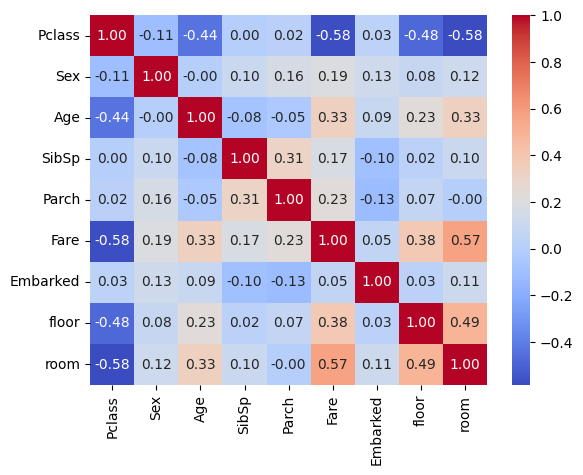

In [60]:
plt.figure()
sns.heatmap(test_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [62]:
test_labels = pd.read_csv('gender_submission.csv')
test_labels.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [63]:
test_labels.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [64]:
test_labels.duplicated().sum()

0

In [65]:
x_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']

In [66]:
x_test = test_data
y_test = test_labels['Survived']

In [67]:
print('x_train shape : ', x_train.shape)
print('y_train shape : ', y_train.shape)
print('x_test shape : ', x_test.shape)
print('y_test shape : ', y_test.shape)

x_train shape :  (891, 9)
y_train shape :  (891,)
x_test shape :  (418, 9)
y_test shape :  (418,)


# Decision Tree

In [68]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.7583732057416268


In [69]:
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))
print('precision : ', metrics.precision_score(y_test, y_pred))
print('Recall : ', metrics.recall_score(y_test, y_pred))

Accuracy :  0.7583732057416268
precision :  0.660377358490566
Recall :  0.6907894736842105


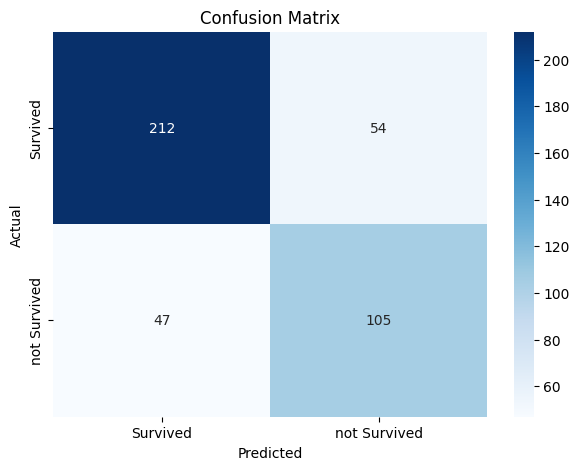

In [70]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Survived', 'not Survived'],
            yticklabels=['Survived', 'not Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [71]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))
print('precision : ', metrics.precision_score(y_test, y_pred))
print('Recall : ', metrics.recall_score(y_test, y_pred))

Accuracy :  0.7942583732057417
precision :  0.7357142857142858
Recall :  0.6776315789473685


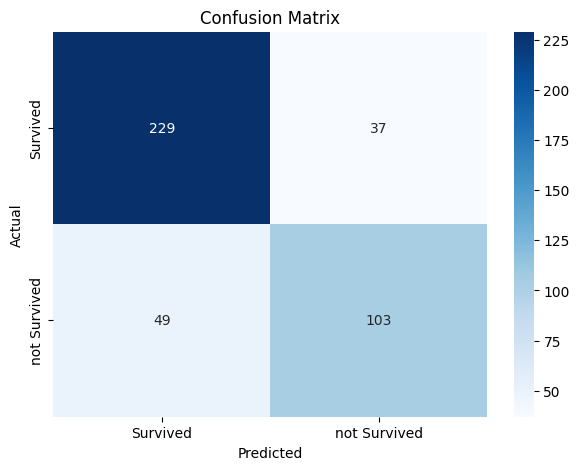

In [72]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Survived', 'not Survived'],
            yticklabels=['Survived', 'not Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# AdaBoost

In [73]:
# Initialize the AdaBoostClassifier
Ada_boost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)

Ada_boost.fit(x_train, y_train)

predict = Ada_boost.predict(x_test)

print('Accuracy : ', metrics.accuracy_score(y_test, predict))
print('precision : ', metrics.precision_score(y_test, predict))
print('Recall : ', metrics.recall_score(y_test, predict))

C:\Users\ME\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Accuracy :  0.9138755980861244
precision :  0.8580246913580247
Recall :  0.9144736842105263


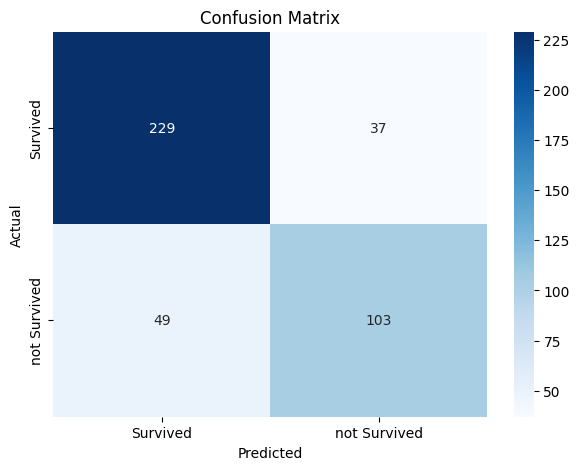

In [74]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Survived', 'not Survived'],
            yticklabels=['Survived', 'not Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()